In [1]:
import joblib 
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv("E:/ML/Applied ML Algorithms/L1/val_features.csv")
val_label = pd.read_csv("/ML/Applied ML Algorithms/L1/val_label.csv")

test_features = pd.read_csv("/ML/Applied ML Algorithms/L1/test_features.csv")
test_label = pd.read_csv("/ML/Applied ML Algorithms/L1/test_label.csv")

In [2]:
models = {}
for mdl in {'LR', 'MLP', 'RF', 'SVM', 'BM'}:
    models[mdl] = joblib.load('/ML/Applied ML Algorithms/Models/{}_model.pkl'.format(mdl))

In [3]:
models['RF']

RandomForestClassifier(max_depth=4, n_estimators=50)

### Evaluate models on the validation set
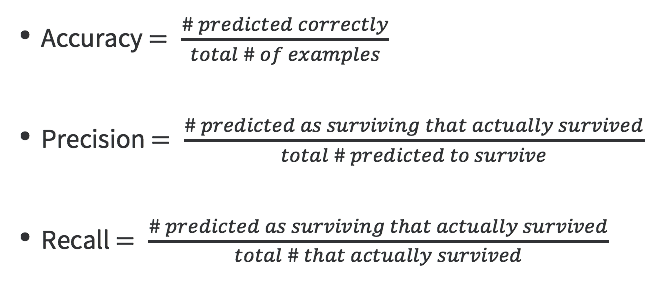

__accuracy__ is just the number correctly predicted over the total number of examples. __Precision__ is the number predicted as surviving, that actually survived, divided by the total number predicted to survive. So in other words, it says when the model predicted someone would survive, how often did they actually survive? __Recall__ is the compliment to that. So it's number predicted as surviving that actually survived divided by the total number that actually survived. In other words, it says if somebody actually survived, what is the likelihood that the model correctly predicted that they would survive

In [4]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end-start)*1000, 1)))

In [5]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_label)

BM -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 13.0ms
LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 5.3ms
MLP -- Accuracy: 0.781 / Precision: 0.717 / Recall: 0.662 / Latency: 20.2ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 10.8ms
RF -- Accuracy: 0.798 / Precision: 0.764 / Recall: 0.646 / Latency: 25.7ms


I mentioned how, if I ran, for instance, random forest twice, I'd get different results. It's critical to understand that this was only in the training phase. You can run the same training twice on the exact same data and get two slightly different models. What we're dealing with now is a stored fit concrete model. So at this point, if I run this cell twice, I'll get the same exact results. The only difference might be the latency, but the actual accuracy will remain exactly the same. 

There's a couple of things to note here. First, the random forest model is generating the best results on this unseen data. It has the best accuracy, the best precision, and it's tied for the best recall. The second thing to note is random forest also takes the longest to make predictions. So this brings us to a conversation about trade-offs. There are really two types of trade-offs. The first is precision versus recall. In this case, we're lucky because random forest has the best precision, and it's tied for the best recall, but typically, you have to make a trade off here. You have to give up some recall for gains in precision, or vice versa. Which model you choose will really come down to the problem you're trying to solve, or the business use case. For instance, if this is a spam detection problem, then we would optimize for precision. In other words, if your model says that it's spam, it better be spam, or else we'll be blocking real emails that people would want to see. On the other side, if this is a fraud detection model, you're more likely to optimize for recall, because missing any one of these real fraudulent transactions could cost thousands or even tens of thousands of dollars. The second trade off is between overall accuracy, and when I say overall accuracy, I mean precision recall and accuracy, and latency. So again, trade off between overall accuracy and latency. And in our case, our best model based on accuracy is also the slowest model to make predictions. So if we were deploying this model in a real-time environment where the prediction speed was critical, perhaps we would choose the gradient boosting model, where we're giving up just a little bit of accuracy, but we're reducing the latency by quite a bit. Since we have no such prediction time requirements, we're going to select the random forest model is our best model on this problem. And let's go ahead and evaluate this on the test set. So just like we saw before, let's use our evaluate model function. And recall, this evaluate model function wants you to pass in the model name, the model object, the features to be used to make predictions, and then the labels that those predictions will be compared against. So we're going to manually pass in random forest as the model name, and then we're going to pass in the models dictionary with the RF key, and that will return the scikit-learn model object for the random forest model. Then we'll pass in the test features and the test labels. Now we should see performance that aligns fairly closely with the validation set. And I just want to highlight that the reason we evaluate both on the validation set and the test set is because we used performance on the validation set to select our best model. So in a sense, the validation set played a role in our selection of what our best model was for this problem. So this test set will not be used for any kind of model selection. So it is a completely unbiased view of how we can expect this model to perform moving forward. Again, ideally, we're just looking for performance that is relatively close to what we saw in the validation set. So we do see that performance is relatively close to what we saw on the validation set. Accuracy is just slightly lower, but precision is higher, and recall is just slightly lower. And again, you can see the latency is just a little bit higher, but it's pretty close. So great, now we've explored around 200 candidate models across five different algorithms to try to find the best model for this Titanic dataset. We finally narrowed it down to this random forest model with 50 estimators and a max step of four. We have robustly tested this model by evaluating it on completely unseen data. And we know it generated an accuracy of 82.8% on cross-validation, 82.0% on the validation set, and 81.0% on the test set. So now we have a great feel for the likely performance of the model on new data. And we can be confident in proposing this model as the best model for making predictions on whether people aboard the Titanic will survive or not. This skillset you've learned can now be generalized and applied to any problem in front of you to identify the best model for that specific problem.

In [6]:
evaluate_model('Random Forest', models['RF'], test_features, test_label)

Random Forest -- Accuracy: 0.793 / Precision: 0.82 / Recall: 0.658 / Latency: 29.6ms
